<a href="https://colab.research.google.com/github/anurag629/BotaniScan-API/blob/main/notebooks/botaniscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dividing into training and testing

##### Import the necessary libraries:

In [ ]:
import os
import random
import shutil

##### Define the ratio of data you want to allocate for training and testing. For example, you can choose to allocate 80% for training and 20% for testing:

In [ ]:
train_ratio = 0.8
test_ratio = 0.2


##### Create two new directories for the training and testing data:

In [ ]:
os.makedirs('../data/Train', exist_ok=True)
os.makedirs('../data/Test', exist_ok=True)


##### Loop through each plant folder, and for each folder, create subdirectories in the Train and Test folders to store the respective data:

In [ ]:
for plant_folder in os.listdir('../data/Segmented Medicinal Leaf Images'):
    plant_path = os.path.join('../data/Segmented Medicinal Leaf Images', plant_folder)
    train_path = os.path.join('../data/Train', plant_folder)
    test_path = os.path.join('../data/Test', plant_folder)

    # Create training and testing directories for each plant
    os.makedirs(train_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

    # List all the images in the plant folder
    images = os.listdir(plant_path)

    # Randomly shuffle the images
    random.shuffle(images)

    # Calculate the number of images for training and testing
    num_train = int(len(images) * train_ratio)

    # Split the images into training and testing sets
    train_images = images[:num_train]
    test_images = images[num_train:]

    # Copy the images to their respective directories
    for image in train_images:
        src = os.path.join(plant_path, image)
        dest = os.path.join(train_path, image)
        shutil.copy(src, dest)

    for image in test_images:
        src = os.path.join(plant_path, image)
        dest = os.path.join(test_path, image)
        shutil.copy(src, dest)


## Importing library and modeules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Loading Dataset from Kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download -d anurag629/medical-leaf-dataset

100% 403M/404M [00:23<00:00, 22.1MB/s]
100% 404M/404M [00:23<00:00, 17.8MB/s]


In [6]:
! unzip '/content/medical-leaf-dataset.zip'

Archive:  /content/medical-leaf-dataset.zip
  inflating: Test/Alpinia Galanga (Rasna)/AG-S-002.jpg  
  inflating: Test/Alpinia Galanga (Rasna)/AG-S-004.jpg  
  inflating: Test/Alpinia Galanga (Rasna)/AG-S-006.jpg  
  inflating: Test/Alpinia Galanga (Rasna)/AG-S-009.jpg  
  inflating: Test/Alpinia Galanga (Rasna)/AG-S-021.jpg  
  inflating: Test/Alpinia Galanga (Rasna)/AG-S-023.jpg  
  inflating: Test/Alpinia Galanga (Rasna)/AG-S-033.jpg  
  inflating: Test/Alpinia Galanga (Rasna)/AG-S-035.jpg  
  inflating: Test/Alpinia Galanga (Rasna)/AG-S-037.jpg  
  inflating: Test/Alpinia Galanga (Rasna)/AG-S-047.jpg  
  inflating: Test/Amaranthus Viridis (Arive-Dantu)/AV-S-006.jpg  
  inflating: Test/Amaranthus Viridis (Arive-Dantu)/AV-S-011.jpg  
  inflating: Test/Amaranthus Viridis (Arive-Dantu)/AV-S-015.jpg  
  inflating: Test/Amaranthus Viridis (Arive-Dantu)/AV-S-019.jpg  
  inflating: Test/Amaranthus Viridis (Arive-Dantu)/AV-S-020.jpg  
  inflating: Test/Amaranthus Viridis (Arive-Dantu)/AV-S-

## Train and Test data

#### learn more about pathlib
* https://towardsdatascience.com/10-examples-to-master-python-pathlib-1249cc77de0b

In [7]:
import pathlib
train_dir = pathlib.Path("/content/Train")
test_dir = pathlib.Path("/content/Test")

#### New function/Concept 'glog()'
* The glob module is a useful part of the Python standard library. glob (short for global) is used to return all file paths that match a specific pattern.

* We can use glob to search for a specific file pattern, or perhaps more usefully, search for files where the filename matches a certain pattern by using wildcard characters.
* Learn more about glob
* https://towardsdatascience.com/the-python-glob-module-47d82f4cbd2d

In [8]:
# Total number of images in training data-set

image_count = len(list(train_dir.glob('*/*.jpg')))
image_count

1455

## Showing / Visualize Image


* here we are using matplotlib for visualizing our data
* we have open our image and converted to digits using Pillow


(1200, 1600, 3)
/content/Train/Alpinia Galanga (Rasna)/AG-S-029.jpg
(1200, 1600, 3)
/content/Train/Alpinia Galanga (Rasna)/AG-S-019.jpg
(1200, 1600, 3)
/content/Train/Alpinia Galanga (Rasna)/AG-S-007.jpg


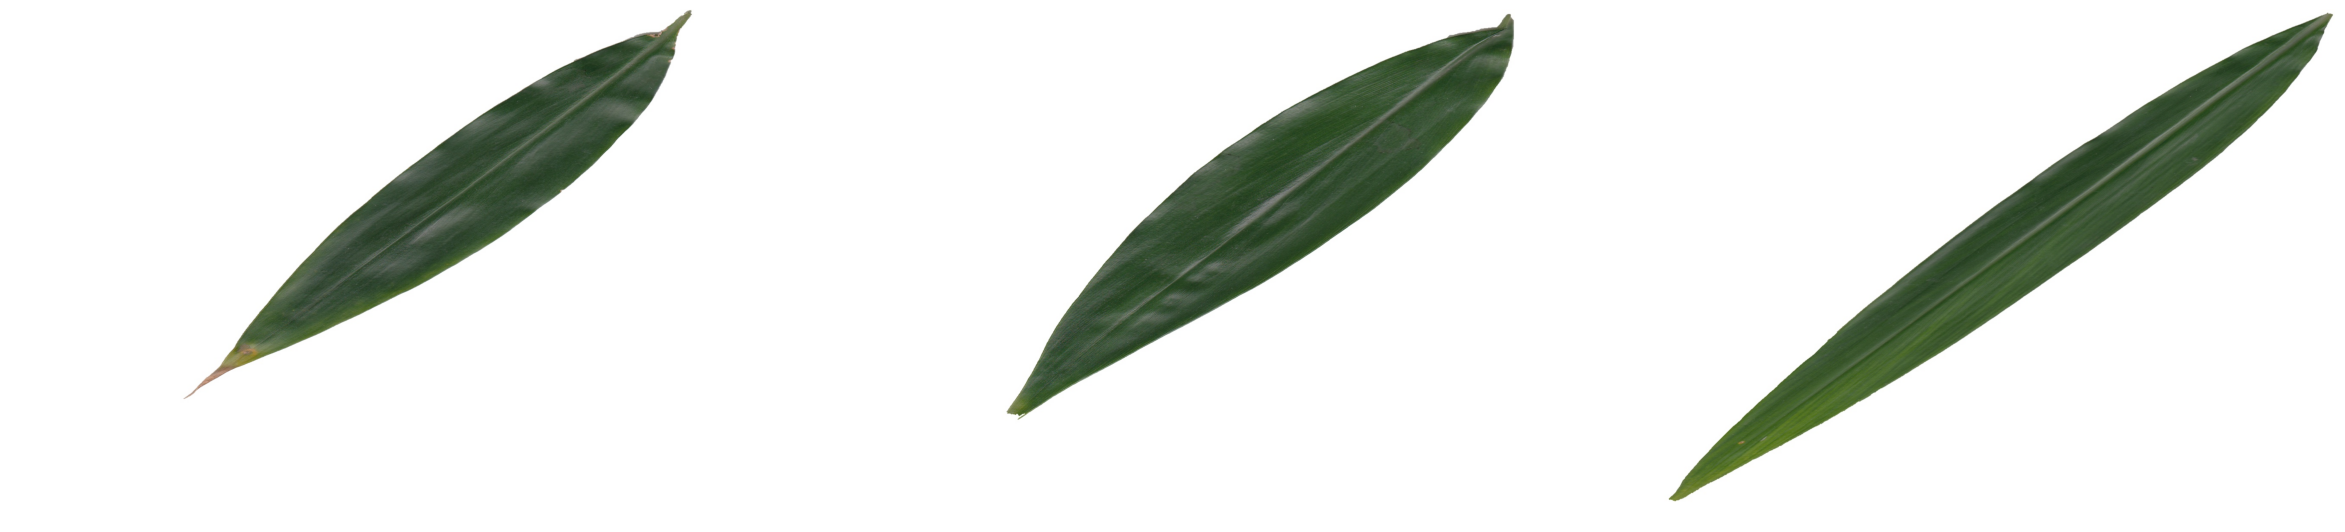

In [9]:
import matplotlib.pyplot as plt
import PIL
import cv2
fruits = list(train_dir.glob('Alpinia Galanga (Rasna)/*.jpg'))

plt.figure(figsize=(30, 30))

for i in range(3):
    plt.subplot(3, 3, i + 1)
    img = PIL.Image.open(str(fruits[i]))
    imgshape = cv2.imread(str(fruits[i]), cv2.IMREAD_UNCHANGED)
    print(imgshape.shape)
    print(str(fruits[i]))
    plt.imshow(img)
    plt.axis('off')

plt.show()

# Setting Up variables

In [10]:
batch_size = 32
img_height = 250
img_width = 250


## Collecting Data
#### Used keras 'image_dataset_from_directory' API for collrcting data from directories
* Learn more about 'image_dataset_from_directory'
* https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

In [11]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1455 files belonging to 30 classes.
Using 1164 files for training.


In [12]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 1455 files belonging to 30 classes.
Using 291 files for validation.


## Visualizing friuts by classes

In [13]:
class_names = train_ds.class_names
num_classes = len(class_names)

In [14]:
print(num_classes)

30


In [15]:
print(class_names)

['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']


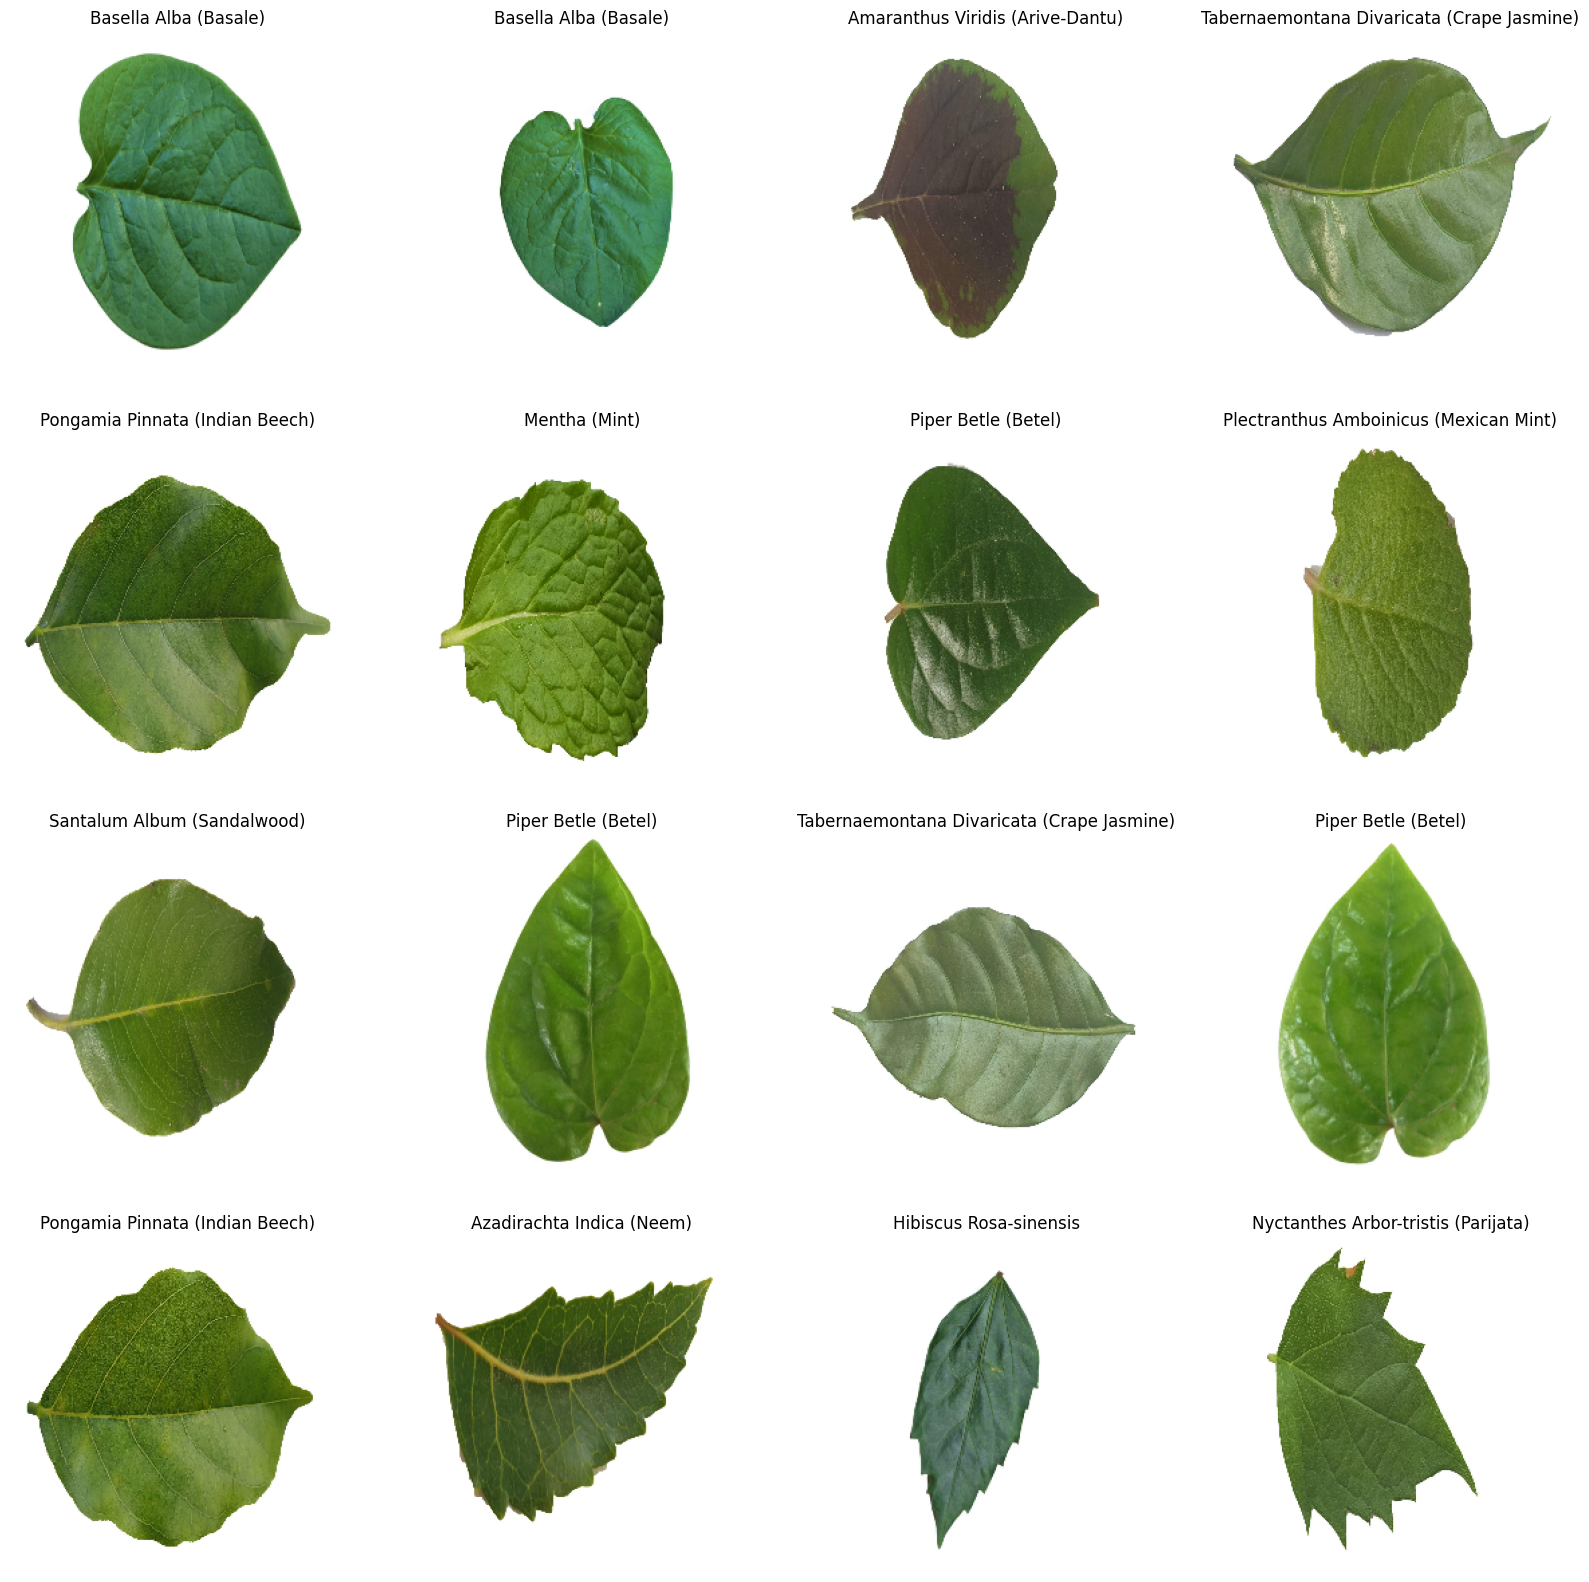

In [16]:
plt.figure(figsize=(20, 20))

for images, labels in train_ds.take(1):
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

# Preprocessing/Setting Up Base Model

### prefetch the data for faster training while model is trained
* Learning more about prefetch and AUTOTUNE
* prefetch : https://towardsdatascience.com/optimising-your-input-pipeline-performance-with-tf-data-part-1-32e52a30cac4#:~:text=Prefetching%20solves%20the,they%20are%20requested.
* AUTOTUNE : https://stackoverflow.com/questions/56613155/tensorflow-tf-data-autotune

In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Data Augumentation
* Data augmentation is a set of techniques to artificially increase the amount of data by generating new data points from existing data. This includes making small changes to data or using deep learning models to generate new data points.



In [18]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

### Using ResNEt Model for Transfer Learning
* Learn more about ResNet by going through paper
* https://paperswithcode.com/method/resnet

In [19]:
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [20]:
base_model = tf.keras.applications.resnet.ResNet50(
    input_shape=(img_height, img_width, 3),
    include_top=False,
    weights='imagenet'
)

94765736/94765736 [==============================] - 5s 0us/step


* setting base model trainable to False so model take less time

In [21]:
base_model.trainable = False

In [22]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(num_classes)

# Building Model

In [23]:
inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001, weight_decay=1e-4)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [29]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 250, 250, 3)       0         
                                                                 
 tf.__operators__.getitem (  (None, 250, 250, 3)       0         
 SlicingOpLambda)                                                
                                                                 
 tf.nn.bias_add (TFOpLambda  (None, 250, 250, 3)       0         
 )                                                               
                                                                 
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0     

# Training the model

In [30]:
model.evaluate(val_ds)

10/10 [==============================] - 3s 109ms/step - loss: 0.2323 - accuracy: 0.9450


[0.23228409886360168, 0.9450171589851379]

* evolution accuracy is very bad but wait for traning

In [32]:
epochs = 25

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds
)

Epoch 1/25
37/37 [==============================] - 6s 162ms/step - loss: 0.0958 - accuracy: 0.9888 - val_loss: 0.1612 - val_accuracy: 0.9553
Epoch 2/25
37/37 [==============================] - 6s 160ms/step - loss: 0.0955 - accuracy: 0.9880 - val_loss: 0.1550 - val_accuracy: 0.9588
Epoch 3/25
37/37 [==============================] - 6s 163ms/step - loss: 0.0876 - accuracy: 0.9897 - val_loss: 0.1574 - val_accuracy: 0.9553
Epoch 4/25
37/37 [==============================] - 6s 160ms/step - loss: 0.0854 - accuracy: 0.9905 - val_loss: 0.1587 - val_accuracy: 0.9588
Epoch 5/25
37/37 [==============================] - 6s 159ms/step - loss: 0.0850 - accuracy: 0.9914 - val_loss: 0.1542 - val_accuracy: 0.9588
Epoch 6/25
37/37 [==============================] - 6s 160ms/step - loss: 0.0765 - accuracy: 0.9948 - val_loss: 0.1556 - val_accuracy: 0.9588
Epoch 7/25
37/37 [==============================] - 6s 158ms/step - loss: 0.0846 - accuracy: 0.9914 - val_loss: 0.1475 - val_accuracy: 0.9622
Epoch 

# Visualization of Accuracy and loss

### Loss

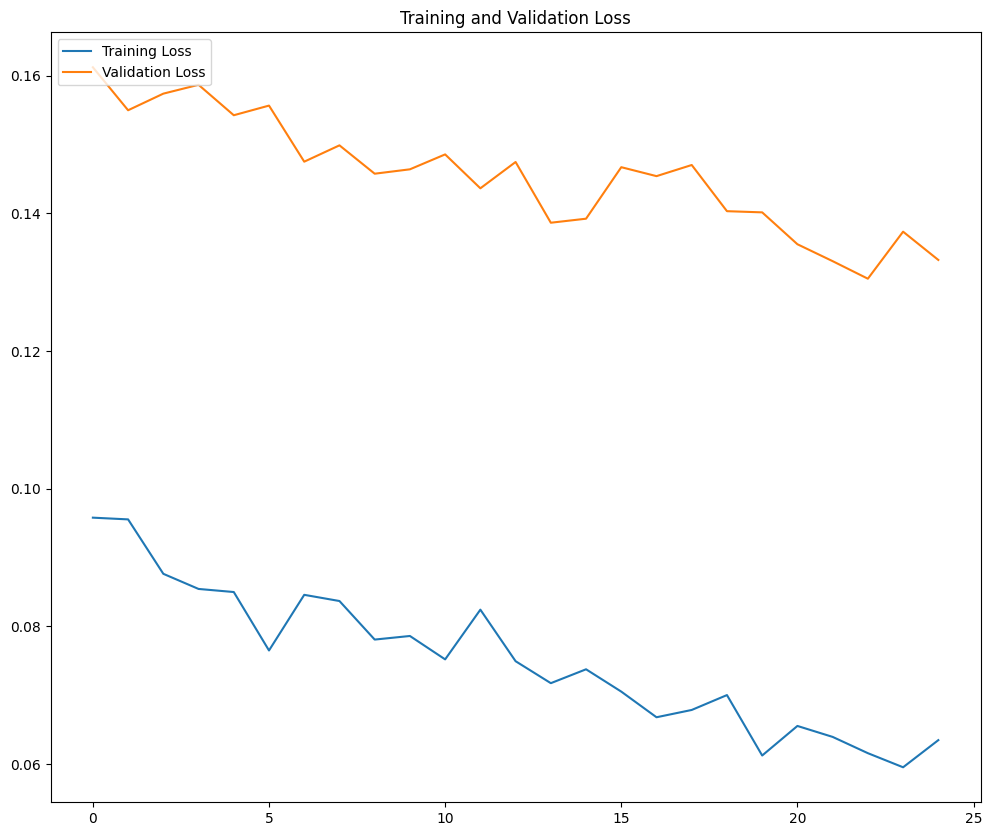

In [33]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 10))
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc='upper left')
plt.title('Training and Validation Loss')

plt.show()

### Accuracy

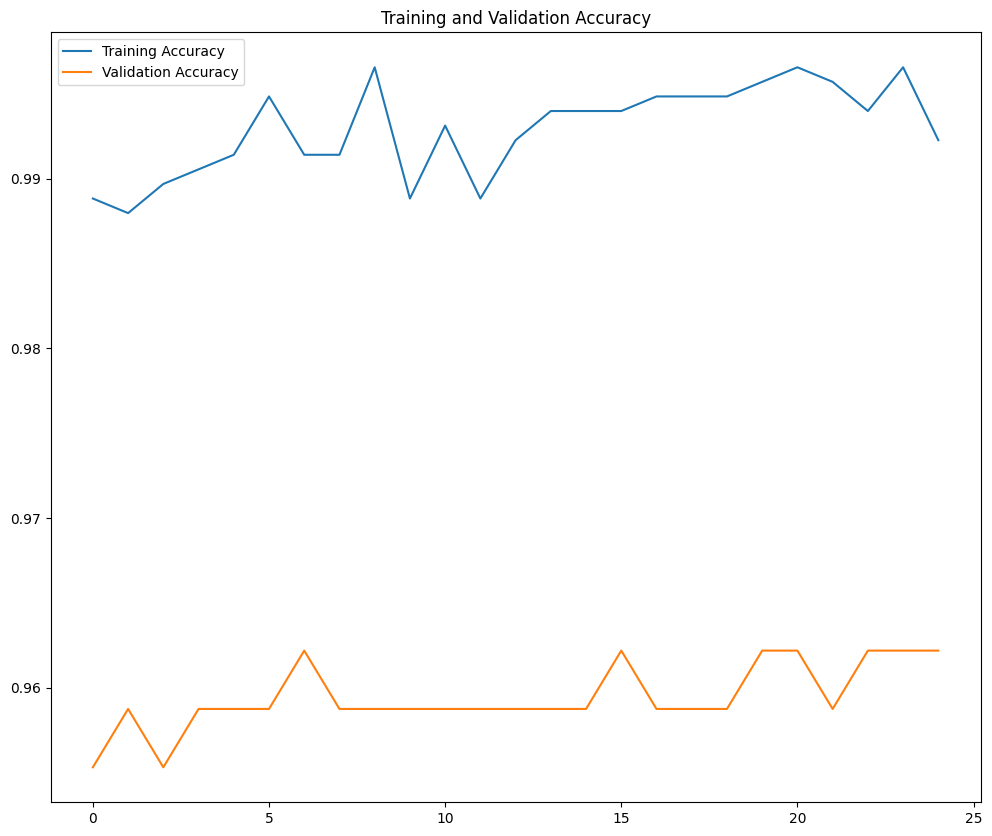

In [34]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs_range = range(epochs)

plt.figure(figsize=(12, 10))
plt.plot(epochs_range, train_acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')

plt.show()

# I hope you like this ;)

# Checking prediction on validation data-set with visualisation

In [35]:
def predict(model, img):
    img_array = tf.keras.utils.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 0)
    return predicted_class, confidence

1/1 [==============================] - 0s 25ms/step


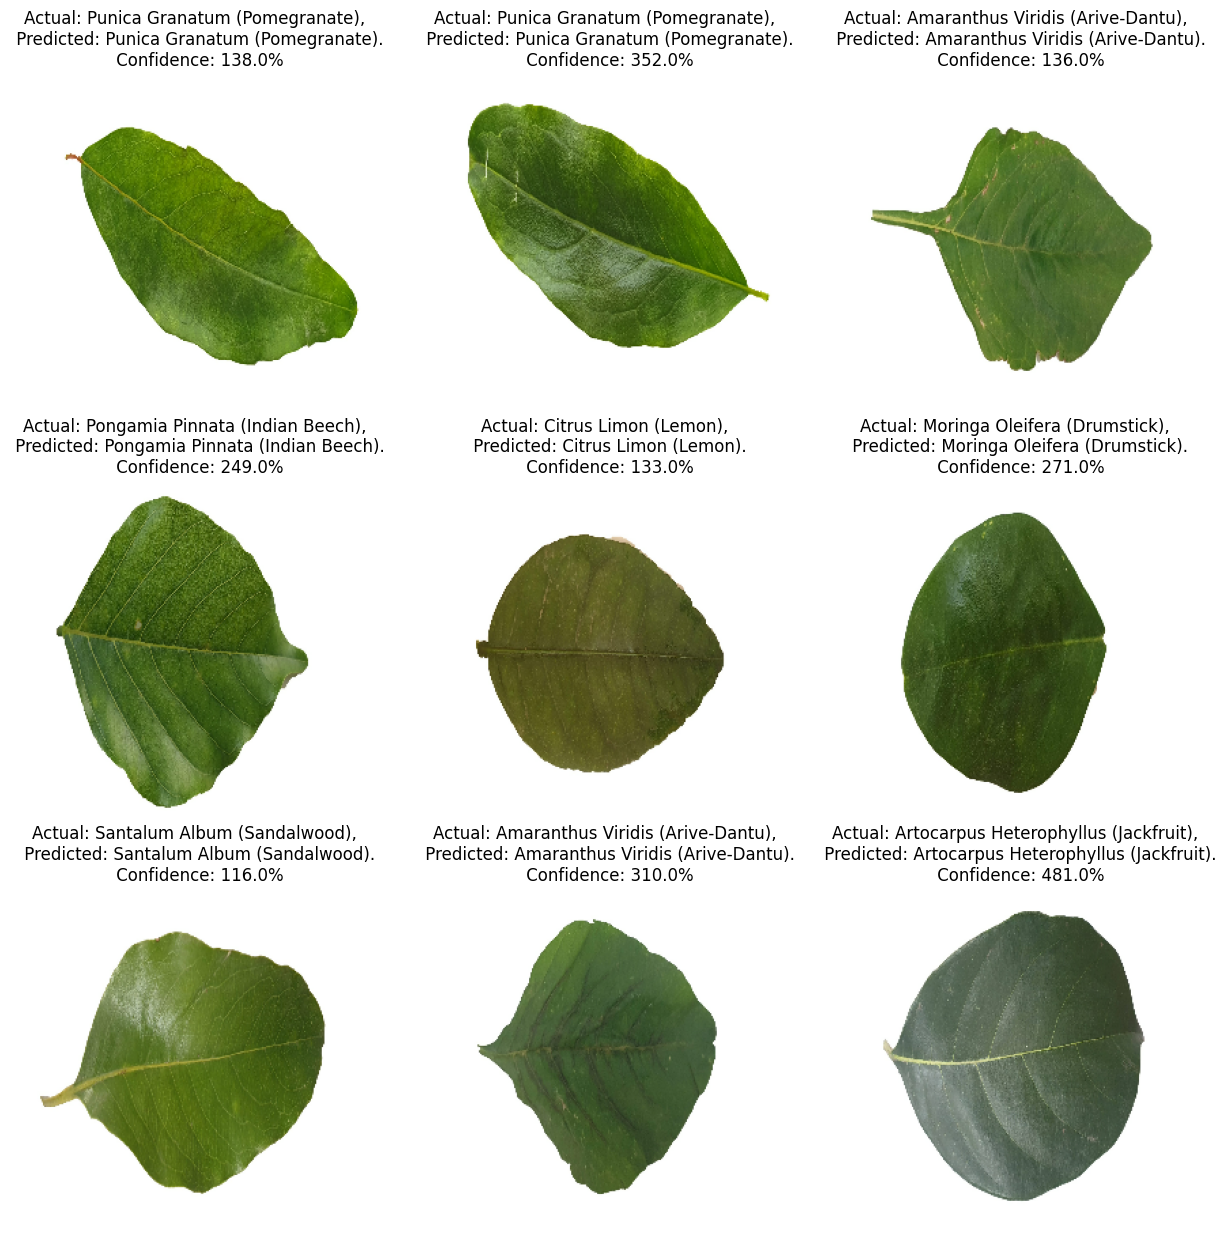

In [36]:
plt.figure(figsize=(15, 15))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis('off')



# Saving model

In [37]:
model_version = 1
model.save(f"./models/{model_version}")

In [41]:
model.save('tf_model.h5')

In [40]:
import json
from tensorflow.keras.models import load_model

# Load the trained model from the .h5 file
trained_model = load_model('/content/model.h5')

# Serialize the model architecture to JSON
model_json = trained_model.to_json()

# Convert the JSON string to a Python dictionary
model_config = json.loads(model_json)

# Save the model configuration as a JSON object to a file
with open('config.json', 'w') as json_file:
    json.dump(model_config, json_file, indent=4)


In [ ]:
import json

# create json save function
def save_json(model, filepath, X_train, y_train):
    saved_model = {}
    saved_model["algorithm"] = model.get_params()['algorithm'],
    saved_model["max_iter"] = model.get_params()['leaf_size'],
    saved_model["solver"] = model.get_params()['metric'],
    saved_model["metric_params"] = model.get_params()['metric_params'],
    saved_model["n_jobs"] = model.get_params()['n_jobs'],
    saved_model["n_neighbors"] = model.get_params()['n_neighbors'],
    saved_model["p"] = model.get_params()['p'],
    saved_model["weights"] = model.get_params()['weights'],
    saved_model["X_train"] = X_train.tolist() if X_train is not None else "None",
    saved_model["y_train"] = y_train.tolist() if y_train is not None else "None"

    json_txt = json.dumps(saved_model, indent=4)
    with open(filepath, "w") as file:
        file.write(json_txt)

# save the iris-classification model in a json file
file_path = 'config.json'
save_json(model, file_path, train_ds, y_train)

# Zipping all the files in models

In [38]:
import shutil
shutil.make_archive("model", 'zip', './')

KeyboardInterrupt: ignored

# Model Trained with >99% accuracy and >95% validation accuracy